In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
Raw_Housing_Data = pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
Raw_Housing_Data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
Raw_Housing_Data['Sale Price'].mean()

540198.4357443658

C:\Users\hp\AppData\Local\Temp\ipykernel_21708\3459847510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['Condition_Sale'][Raw_Housing_Data['Condition of the House']==str(i)]=Raw_Housing_Data['Sale Price'][Raw_Housing_Data['Condition of the House']==str(i)].mean()


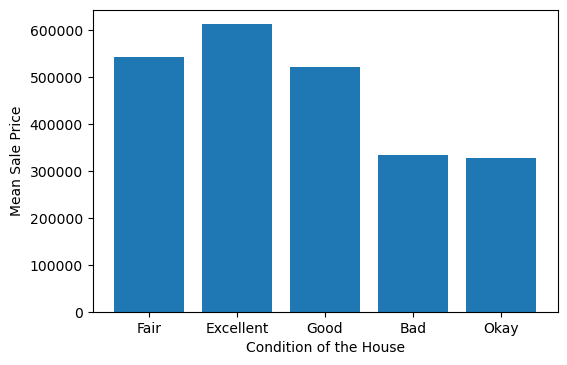

In [5]:
#initialising a new column
Raw_Housing_Data['Condition_Sale']=0

#calculating the mean based on the condition of the house
for i in Raw_Housing_Data['Condition of the House'].unique():
    Raw_Housing_Data['Condition_Sale'][Raw_Housing_Data['Condition of the House']==str(i)]=Raw_Housing_Data['Sale Price'][Raw_Housing_Data['Condition of the House']==str(i)].mean()
    
#plotting the mean sales based on condition of house
plt.figure(dpi=100)
plt.bar(Raw_Housing_Data['Condition of the House'].unique(), Raw_Housing_Data['Condition_Sale'].unique())
plt.xlabel("Condition of the House")
plt.ylabel("Mean Sale Price")
plt.show()

In [6]:
#intializing a new column
Raw_Housing_Data['zip_Condition_Sale']=0

C = 'Condition of the House'
Z = 'Zipcode'

#calculating mean based on condition of the house and zipcode
for i in Raw_Housing_Data[C].unique():
 for j in Raw_Housing_Data[Z].unique():
    Raw_Housing_Data['zip_Condition_Sale'][(Raw_Housing_Data[C]==str(i))& (Raw_Housing_Data[Z]==j)] = Raw_Housing_Data['Sale Price'][(Raw_Housing_Data[C] == str(i)) & (Raw_Housing_Data[Z]==j)].mean()
        
len(Raw_Housing_Data['zip_Condition_Sale'].unique())

C:\Users\hp\AppData\Local\Temp\ipykernel_21708\1072061788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['zip_Condition_Sale'][(Raw_Housing_Data[C]==str(i))& (Raw_Housing_Data[Z]==j)] = Raw_Housing_Data['Sale Price'][(Raw_Housing_Data[C] == str(i)) & (Raw_Housing_Data[Z]==j)].mean()


281

In [8]:
zip_Condition_Sale = Raw_Housing_Data.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()

zip_Condition_Sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [7]:
zipcode_Condition_Sale2 = pd.pivot_table(Raw_Housing_Data, index=["Condition of the House","Zipcode"], values=["Sale Price"],aggfunc = np.mean)

zipcode_Condition_Sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [9]:
zipcode_Condition_Sale3 = pd.pivot_table(Raw_Housing_Data, index=["Zipcode"],columns=['Condition of the House'] values=["Sale Price"], aggfunc = np.mean)

zipcode_Condition_Sale3

SyntaxError: invalid syntax (1815725598.py, line 1)

In [10]:
Raw_Housing_Data['plot_length'] = Raw_Housing_Data['Flat Area (in Sqft)']**0.5
Raw_Housing_Data['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [11]:
Raw_Housing_Data['total_area'] = Raw_Housing_Data['Flat Area (in Sqft)']=Raw_Housing_Data['Lot Area (in Sqft)']
Raw_Housing_Data['total_area'].head()

0     5650.0
1     7242.0
2    10000.0
3     5000.0
4     8080.0
Name: total_area, dtype: float64

In [12]:
Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Fair'] = '1'
Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Okay'] = '0'
Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Bad'] = '0'
Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Good'] = '1'
Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Excellent'] = '3'
Raw_Housing_Data['Condition of the House'].unique()

C:\Users\hp\AppData\Local\Temp\ipykernel_21708\4109191305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Fair'] = '1'
C:\Users\hp\AppData\Local\Temp\ipykernel_21708\4109191305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['Condition of the House'][Raw_Housing_Data['Condition of the House'] == 'Okay'] = '0'
C:\Users\hp\AppData\Local\Temp\ipykernel_21708\4109191305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

array(['1', '3', '0'], dtype=object)

In [14]:
Raw_Housing_Data['Condition of the House']=Raw_Housing_Data['Condition of the House'].map({'Good':'1',
                                                                                         'Excellent':'3',
                                                                                         'Bad':'0',
                                                                                         'Fair':'1',
                                                                                         'Okay':'0'})
Raw_Housing_Data['Condition of the House'].unique()

array([nan], dtype=object)